# Credit Card Fraud Detection

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, classification_report, average_precision_score
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [2]:
data = pd.read_csv("../dataset/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62873,50461.0,-0.929423,-0.230850,2.239642,-0.622143,-0.747027,0.693916,0.297491,0.360018,0.129358,...,0.013037,-0.032038,0.267946,0.112356,-0.353984,1.275938,-0.021873,0.092166,152.13,0
73333,55087.0,1.146695,0.031921,-0.186913,0.956262,0.253114,0.280441,0.070548,0.153111,0.092139,...,0.003550,0.047815,-0.228849,-0.672101,0.780425,-0.221071,0.008256,-0.004282,33.92,0
157128,109559.0,-0.735219,0.980973,2.188423,-0.372297,0.343890,0.239918,0.432699,-0.095709,1.408911,...,-0.303379,-0.347797,-0.354294,-0.491505,0.326281,-0.718432,0.029372,-0.094963,2.30,0
229233,145848.0,2.137061,0.103620,-2.486617,0.096313,0.807454,-1.394665,0.868925,-0.504654,-0.286295,...,0.280411,0.951819,-0.214320,-0.228607,0.616693,1.020206,-0.153076,-0.112088,2.00,0
91137,63328.0,1.098240,0.233536,0.565405,1.226902,-0.501793,-1.033403,0.262437,-0.281101,-0.129224,...,0.014491,-0.015116,-0.042621,0.736630,0.511948,-0.468859,0.018516,0.041338,62.48,0
61401,49815.0,-1.632933,0.059875,1.759088,-0.255133,0.734990,-0.452811,0.437363,0.039810,-0.277958,...,-0.125243,-0.407841,-0.240102,0.029989,0.501780,0.173050,-0.373031,0.320057,38.42,0
230062,146170.0,-0.476020,1.156489,1.967097,3.930087,0.910186,2.193240,-0.047045,0.532471,-2.117788,...,0.225333,0.537294,-0.373719,-0.358269,0.268825,0.584390,0.097553,0.088350,34.05,0
243718,152043.0,2.209958,-1.268961,-1.540295,-1.839839,-0.140742,0.602370,-0.959306,0.041599,-1.754894,...,0.162922,1.084851,0.181636,-0.232374,-0.083799,0.130019,0.041645,-0.063079,15.00,0
284746,172735.0,-0.899559,-0.047744,0.717555,-3.262816,-0.384415,-0.164529,-0.227184,0.272726,-1.835745,...,-0.289810,-0.464731,-0.434248,0.009776,0.803066,-0.129513,-0.176856,-0.190917,10.00,0
103177,68535.0,-1.746279,1.115847,2.492159,2.619597,-0.433320,0.739785,-0.580122,0.677893,-0.784400,...,0.155398,0.952813,0.095794,0.010705,0.249511,0.416792,0.347509,0.009114,8.04,0


In [4]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
data.shape

(284807, 31)

In [6]:
# checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

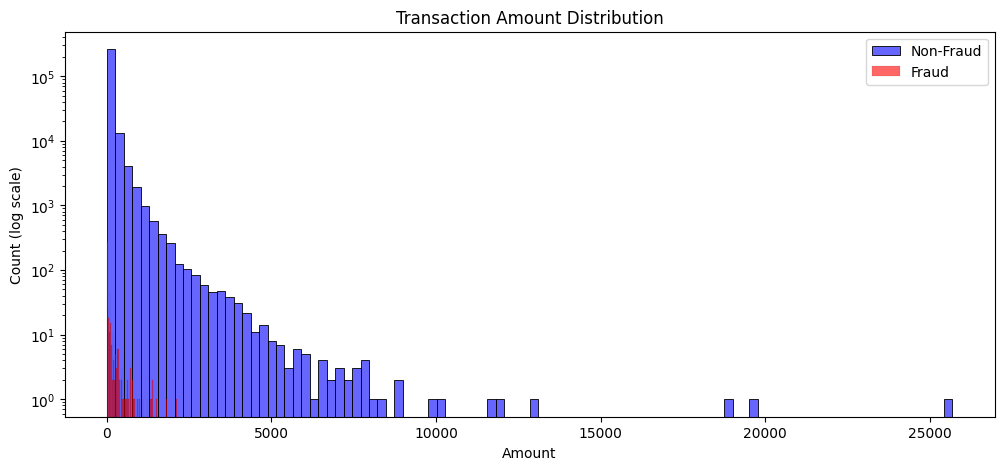

In [8]:
# exploratory data analysis (eda)
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=100, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()


/tmp/ipykernel_14948/2112623404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds_r')


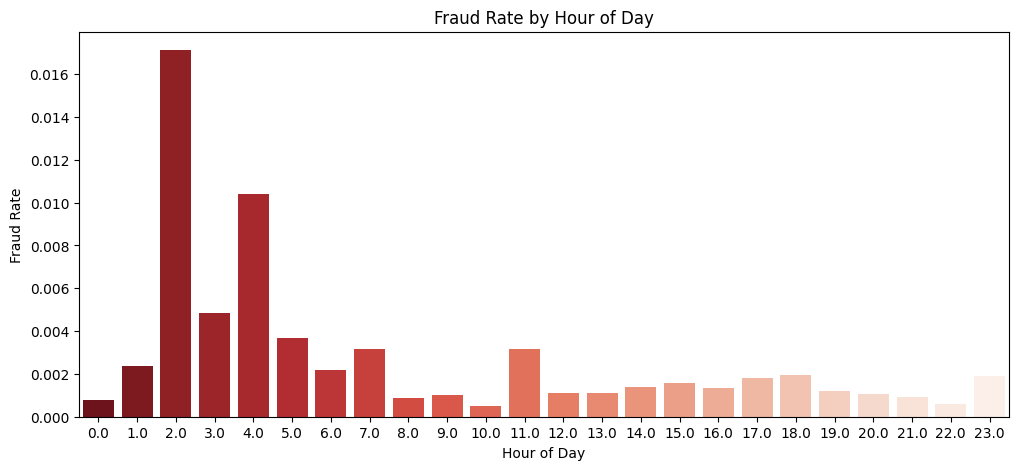

In [9]:
# Create hour feature
data['Hour'] = (data['Time'] // 3600) % 24

# Compute fraud rate per hour
fraud_rate_by_hour = data.groupby('Hour')['Class'].mean()

plt.figure(figsize=(12,5))
sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values, palette='Reds_r')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.show()


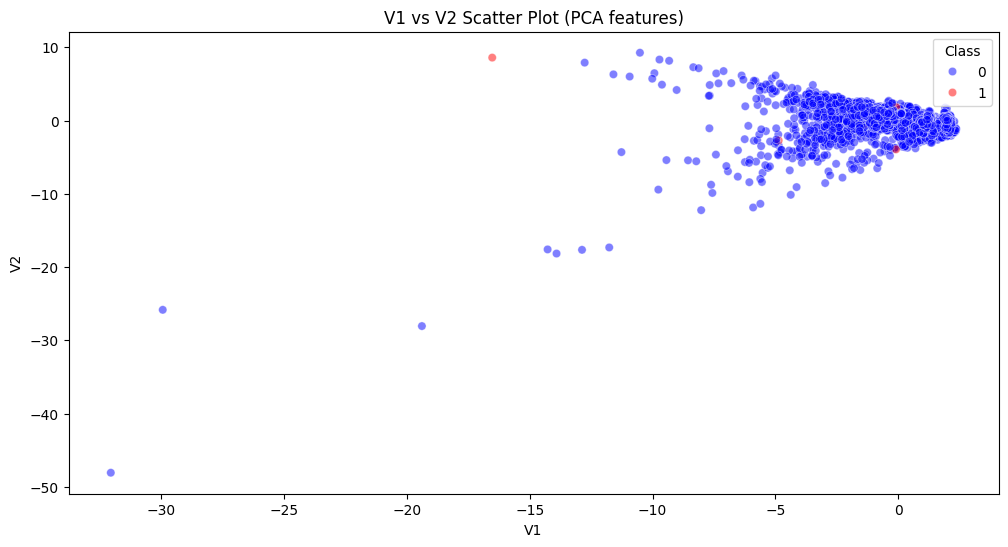

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='V1', y='V2',
    hue='Class',
    data=data.sample(5000, random_state=42),
    palette={0:'blue', 1:'red'},
    alpha=0.5
)
plt.title('V1 vs V2 Scatter Plot (PCA features)')
plt.show()

In [14]:
# preprocessing the dataset
data.shape


(284807, 32)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
data["Hour"].value_counts()

Hour
21.0    17703
18.0    17039
11.0    16856
20.0    16756
10.0    16598
14.0    16570
15.0    16461
16.0    16453
17.0    16166
9.0     15838
19.0    15649
22.0    15441
12.0    15420
13.0    15365
23.0    10938
8.0     10276
0.0      7695
7.0      7243
1.0      4220
6.0      4101
3.0      3492
2.0      3328
5.0      2990
4.0      2209
Name: count, dtype: int64

In [18]:
data["Time"].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64

In [19]:
data["Time"].sample(10)

59727      48972.0
162992    115553.0
51964      45214.0
238122    149532.0
95689      65423.0
8948       12316.0
176052    122609.0
263668    161061.0
101395     67819.0
75235      55961.0
Name: Time, dtype: float64

In [20]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [21]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
283611,171732.0,1.988773,-0.098661,-1.165009,0.554404,0.005663,-0.983443,0.302932,-0.377625,0.750249,...,0.252289,0.075823,0.041074,0.202523,-0.298450,-0.001964,-0.050705,28.00,0,23.0
57984,48177.0,-1.453150,1.139567,1.797239,1.212794,-0.775063,0.120845,-1.105874,-2.546061,0.252759,...,1.225820,-0.087330,0.722052,-0.319397,-0.301971,-0.527459,-0.369200,1.00,0,13.0
36668,38635.0,0.892810,-0.323613,0.830014,1.391741,-0.886776,-0.317968,-0.246438,0.095602,0.429543,...,0.384164,-0.089711,0.382376,0.294081,-0.300495,0.028848,0.051347,130.20,0,10.0
215197,139972.0,-2.276784,1.100852,-1.249310,-1.279768,1.530800,-1.259376,1.425747,-0.502028,0.184538,...,0.779926,-0.926314,0.888897,0.136665,0.024013,-0.104839,-0.284721,33.36,0,14.0
32658,36903.0,1.452201,-0.483244,0.017630,-0.827356,-0.607040,-0.581806,-0.470219,-0.228336,-0.809434,...,0.715285,-0.272481,-0.391336,0.773084,0.008277,0.003662,0.007200,23.40,0,10.0
241277,150959.0,-1.153799,0.102967,0.055601,-2.171399,0.199031,-0.178714,-0.293528,0.636010,-1.219435,...,0.810517,-0.175581,0.185216,0.158470,-0.196705,0.237953,0.100756,69.00,0,17.0
93189,64286.0,-1.704321,1.987440,-1.365445,-1.716969,-0.741803,-1.282096,-0.325045,1.164042,-0.412911,...,0.397778,-0.135856,-0.338688,0.075402,0.142679,-0.776602,-0.123205,10.44,0,17.0
48373,43615.0,0.463799,-2.237057,0.681836,0.020684,-2.031238,-0.160500,-0.495688,-0.081504,0.040013,...,-0.035238,-0.397401,0.452919,0.226491,-0.293696,-0.030114,0.105010,464.32,0,12.0
269248,163606.0,2.072391,-0.049800,-1.125237,0.381304,-0.066244,-1.127889,0.186362,-0.329436,0.541453,...,-0.720856,0.321010,-0.108523,-0.276491,0.204839,-0.070522,-0.061257,1.98,0,21.0
56082,47262.0,1.028755,-0.146961,1.635287,3.008049,-0.907371,1.033486,-0.884953,0.527755,0.998516,...,-0.510591,0.085456,0.043593,0.275093,-0.024128,0.064086,0.026075,7.61,0,13.0


In [22]:
data = data.drop("Hour", axis=1)
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62595,50334.0,-2.092124,-1.562969,0.654046,-1.175726,0.085437,-1.468131,-0.060539,0.271392,-1.668090,...,-0.215343,-1.209124,0.433268,0.029619,-0.362945,0.627257,-0.119482,-0.186463,180.00,0
10090,15324.0,-3.690755,3.414470,0.714492,-1.985861,-0.543478,-1.366884,1.123768,-0.849273,5.116339,...,-0.965167,-0.590039,0.046301,0.623774,0.368253,0.566924,0.708040,-0.355509,2.31,0
118807,75221.0,-0.720148,0.400167,1.119053,0.713964,0.309036,1.227286,0.575432,0.339188,-0.108299,...,-0.152466,-0.361499,-0.050267,-1.204955,-0.159680,-0.407961,0.068194,0.114772,108.62,0
225614,144318.0,-0.352196,0.249673,-1.555285,-0.272258,-0.464907,-0.940449,1.444924,0.157664,0.457326,...,0.190874,0.184470,0.984390,-0.196257,-1.883471,-0.453959,0.154815,0.343498,273.32,0
24975,33465.0,1.187202,-1.147912,1.421788,-0.348137,-2.082405,-0.254263,-1.373797,0.140300,0.210488,...,-0.177147,-0.058086,0.008741,0.431973,-0.036131,1.144970,-0.007114,0.036274,71.82,0
173111,121359.0,0.179917,1.262325,-2.613707,0.614330,1.639566,-0.104161,1.402747,0.185202,-1.067338,...,0.563969,1.692573,0.000838,-0.322616,-0.968766,-0.344399,0.450987,0.333312,65.00,0
274897,166267.0,-2.033384,1.551496,0.063380,-1.018863,0.178729,-0.342529,0.321498,0.880259,-0.761130,...,-0.009258,-0.300749,-0.377641,0.702700,0.699467,0.376793,-0.267673,-0.043725,50.95,0
135845,81421.0,-0.961357,-4.641397,-0.148189,0.697926,-2.907267,0.104541,0.444168,-0.208681,0.078863,...,0.108896,-1.683899,-0.864931,0.460911,-0.433386,0.789114,-0.234094,0.223360,1187.42,0
30442,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1
28621,35085.0,1.165972,-0.144833,-0.097223,1.736661,1.698404,4.646759,-1.189485,1.205305,0.333703,...,-0.032082,0.113416,-0.165203,1.045671,0.774785,0.228583,0.050559,0.020283,1.52,0


In [23]:
data.shape

(284807, 31)

In [24]:
# two dataset, one with time, one without
timeless_data = data.drop("Time", axis=1)
time_data = data

In [25]:
timeless_data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64729,-1.228567,0.619970,2.089825,1.105723,-1.343898,0.303905,0.435586,0.508563,-0.377951,-0.940537,...,0.205501,0.270710,0.207338,0.330083,0.341522,-0.268411,-0.061106,0.044942,197.45,0
277687,-0.776931,2.451880,-0.267570,4.555574,0.288292,0.503068,-0.288051,-2.336196,-2.564708,1.000871,...,-1.160153,0.841833,0.141210,0.034328,-0.560367,0.374942,0.308526,0.230018,30.45,0
1616,-2.163963,0.112882,-0.228953,-1.989006,-0.162105,-2.041678,-0.156420,0.711216,0.221438,-1.275914,...,0.229458,0.323374,-0.266709,0.605568,-0.088279,-0.176189,0.228252,-0.029373,1.00,0
24417,1.274688,0.257140,0.210314,0.300567,0.081010,-0.167642,0.019744,-0.070468,-0.330464,0.070504,...,-0.246459,-0.691425,0.007393,-0.471015,0.335854,0.124489,-0.026686,0.003059,2.69,0
89835,-2.102575,-1.479136,2.391441,1.289909,1.570253,-1.512880,-0.999665,0.278857,-0.197999,-0.392471,...,0.010912,-0.463697,0.375460,0.628637,0.061857,0.463771,-0.024419,0.119396,29.95,0


In [26]:
timeless_data.shape

(284807, 30)

In [27]:
time_data.shape

(284807, 31)

In [31]:
# splitter function
def split_data(X, y, test_size=0.2, random_srate=21):
    return train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=random_srate
    )

# sampling function
def sample_strategy(X_train, y_train, method="smote"):
    if method == "smote":
        sampler = SMOTE(random_state=21)
    elif method == "undersample":
        sampler == RandomUnderSampler(random_state=21)
    elif method == "combine":
        sampler == SMOTEENN(random_state=21)
    elif method == "none":
        return X_train, y_train
    else:
        raise ValueError("Unknown sampling Method")
    
    return sampler.fit_resample(X_train, y_train)